In [1]:
import os

from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.hdpmodel import HdpModel

import matplotlib.pyplot as plt

dataroot = os.path.join(".")

id2word_path = os.path.join(dataroot, "models", "id2word.dict")
optimal_model_path = os.path.join(dataroot, "models", "lda_model.model")

os.makedirs(os.path.join(dataroot, "view"), exist_ok=True)
os.makedirs(os.path.join(dataroot, "models"), exist_ok=True)

In [2]:
# Load Dictionary
id2word = Dictionary.load(id2word_path)

# Load LDA Model
optimal_model = HdpModel.load(optimal_model_path)

# Get the topic keywords
num_topics = len(optimal_model.get_topics())
topic_keywords = [([word for word, prop in optimal_model.show_topic(t)]) for t in range(num_topics)]

In [5]:
# Run inference on a book example
x = word_tokenize("This is an example of how to run inference but it is a short book".lower())
x = id2word.doc2bow(x)
y_hat = optimal_model[[x]]

Predicted topic for the book "None" is 7 and contains ['bridegroom', 'peal', 'ushered', 'grocer', 'marvelously', 'shyly', 'marvellously', 'wilful', 'hearken', 'suffuse', 'verdict', 'defensive', 'mourner', 'cooking', 'luckily', 'clearness', 'entanglement', 'technical', 'quickness', 'reiterate'] keywords.


Predicted topic for the book "None" are
7 and contains ['bridegroom', 'peal', 'ushered', 'grocer', 'marvelously', 'shyly', 'marvellously', 'wilful', 'hearken', 'suffuse', 'verdict', 'defensive', 'mourner', 'cooking', 'luckily', 'clearness', 'entanglement', 'technical', 'quickness', 'reiterate'] keywords.
1 and contains ['secrete', 'plight', 'heartless', 'irreparable', 'saloon', 'thoughtfulness', 'azure', 'instructor', 'appellation', 'retrospect', 'faultless', 'boss', 'wrestle', 'thigh', 'rove', 'loathe', 'ragged', 'metropolitan', 'conversion', 'wench'] keywords.
0 and contains ['revise', 'fearlessly', 'embolden', 'preferred', 'smoothness', 'den', 'pupils', 'cudgel', 'shamble', 'thicker', 'bacon', 'oppressor', 'deputy', 'paragraph', 'insincerity', 'gentlest', 'serenity', 'ignominiously', 'pigeon', 'discrimination'] keywords.


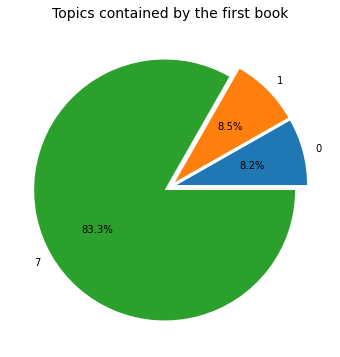

In [11]:
_threshold = 0.05
data = {k: v for k, v in y_hat[0] if v >= _threshold}
topics = sorted(data.items(), key=lambda e: e[1], reverse=True)
print(f"Predicted topic for the book \"{None}\" are")
for k, v in topics:
    print(f"{k} and contains {topic_keywords[k]} keywords.")

pie, ax = plt.subplots(figsize=[10, 6])

plt.pie(x=data.values(), autopct="%.1f%%", explode=[0.05]*len(data.keys()), labels=data.keys(), normalize=True)
plt.title("Topics contained by the first book", fontsize=14)
plt.show()